In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
df = pd.read_csv('/content/Insurance (1).csv')
df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Missing,Missing,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,Missing,Missing,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,Missing,Missing,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,Missing,Missing,Missing,Missing,Missing,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,Missing,Missing,Missing,Lagos,Lagos,Muuve,1


In [ ]:
# 1. What is the distribution of the target variable (classification outcome)

frequency = df['target'].value_counts()
percentage = df['target'].value_counts()*100/len(df)
result = pd.concat([frequency, percentage], axis=1)
print("Frequency and Percentage Distribution of Target:")
result.columns = ['frequency', 'percentage']
print(result)

Frequency and Percentage Distribution of Target:
        frequency  percentage
target                       
0           10624   87.954301
1            1455   12.045699


In [ ]:
# 2. correlation of age to target

df['Age'].corr(df['target'])

-0.01560342600976322

In [ ]:
# 3.  Average No_Pol (number of policies) per customer

df['No_Pol'].mean()

1.3072274194883682

In [ ]:
# 4. Differences in policy outcomes (target) across different ProductName

Differences = df.groupby('ProductName')['target'].value_counts().unstack(fill_value=0).sort_values(by=1, ascending=False)
Differences.columns = ['No Claim', 'Claim']
print(Differences)

                  No Claim  Claim
ProductName                      
Car Classic           5411   1074
CVTP                   349    120
Car Plus               383    103
Muuve                   28     65
Customized Motor       503     42
CarFlex                147     29
CarSafe               3760     14
Motor Cycle             38      8
Car Vintage              5      0


In [ ]:
# 5.	What is the average duration between Policy Start Date and Policy End Date?

df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])
df['Policy End Date'] = pd.to_datetime(df['Policy End Date'])
df['Policy Duration'] = df['Policy End Date'] - df['Policy Start Date']
average_duration = df['Policy Duration'].mean()
average_duration

Timedelta('349 days 13:23:37.766371388')

In [ ]:
# 6.	Does the Car_Category affect the outcome of the target variable?

Car_Category = pd.crosstab(df['Car_Category'], df['target']).sort_values(by=1, ascending=False)
Car_Category
chi2, p, _, _ = chi2_contingency(Car_Category)
print(Car_Category.head())
print(f"Chi-square test statistic: {chi2}, p-value: {p}")

if p < 0.05:
    print("Conclusion: Yes, car category affects the target outcome.")
else:
    print("Conclusion: There is no significant relationship between them.")

target           0    1
Car_Category           
Saloon        5219  815
Missing       3410  328
JEEP          1773  248
Truck           73   24
Mini Bus        26   10
Chi-square test statistic: 95.37453688817679, p-value: 2.530911423289555e-13
Conclusion: Yes, car category affects the target outcome.


In [ ]:
# 7. How does Car_Make (e.g., TOYOTA, etc.) impact policy outcomes?

Car_dist = pd.crosstab(df['Subject_Car_Make'], df['target']).sort_values(by=1, ascending=False)
Car_dist
chi2, p, _, _ = chi2_contingency(Car_dist)
print(Car_dist.head(7))
print(f"Chi-square test statistic: {chi2}, p-value: {p}")

if p < 0.05:
    print("Conclusion: People who use Toyota, Honda and Lexus car are more likely to claim compared to others")
else:
    print("Conclusion: No significant relationship was found between Subject_Car_Make and target outcome.")

target               0    1
Subject_Car_Make           
TOYOTA            4170  805
Honda              934  109
Missing           2381   95
Lexus              514   90
Mercedes           460   61
Iveco               70   50
Hyundai            409   48
Chi-square test statistic: 435.4786960023955, p-value: 1.2888949682392803e-52
Conclusion: People who use Toyota, Honda and Lexus car are more likely to claim compared to others


In [ ]:
# 8. Are colours prone to negative outcome

Car_Col = pd.crosstab(df['Subject_Car_Colour'], df['target']).sort_values(by=1, ascending=False)
Car_Col
chi2, p, _, _ = chi2_contingency(Car_Col)
print(Car_Col.head())
print(f"Chi-square test statistic: {chi2}, p-value: {p}")

if p < 0.05:
    print("Conclusion: Yes, certain car colours are prone to negative outcome.")
else:
    print("Conclusion: No significant relationship was found between Subject_Car_Colour and target outcome.")

target                 0    1
Subject_Car_Colour           
Missing             6524  438
Black               1598  282
Grey                 388  126
Silver               435  119
As Attached          381  117
Chi-square test statistic: 669.7660267698612, p-value: 3.15495101876956e-112
Conclusion: Yes, certain car colours are prone to negative outcome.


In [ ]:
# 9.	How does the No_Pol correlate with the customer’s age?

df['No_Pol'].corr(df['Age'])

0.11701245630717612

In [ ]:
# 10.	Does LGA_Name (location) or State influence the target variable?

lga = pd.crosstab(df['LGA_Name'], df['target']).sort_values(by=1, ascending=False)
lga
chi2, p, _, _ = chi2_contingency(lga)
print(lga.head())
print('For LGA_Name')
print(f"Chi-square test statistic: {chi2}, p-value: {p}")

if p < 0.05:
    print("LGA significantly influence the target outcome with VI, Ikeja and Abuja having a higher claim rate.")
else:
    print("No statistical significant relationship was found between LGA_Name and target outcome.")

target              0    1
LGA_Name                  
Missing          5971  505
Victoria Island   932  230
Ikeja             346   55
Abuja Municipal   180   52
Lagos             118   50
For LGA_Name
Chi-square test statistic: 807.3077903455949, p-value: 6.970648674847013e-58
LGA significantly influence the target outcome with VI, Ikeja and Abuja having a higher claim rate.


In [ ]:
#10b

State = pd.crosstab(df['State'], df['target']).sort_values(by=1, ascending=False)
State
chi2, p, _, _ = chi2_contingency(State)
print(State.head())
print('For State')
print(f"Chi-square test statistic: {chi2}, p-value: {p}")

if p < 0.05:
    print("Conclusion: State significantly influence the target outcome with Lagos, Benue and Abuja having higher claim rate.")
else:
    print("Conclusion: No statistical significant relationship was found between State and target outcome.")

target              0    1
State                     
Lagos            2629  557
Missing          5982  506
Benue             501  125
Abuja-Municipal   180   52
Delta              58   28
For State
Chi-square test statistic: 430.0590876917321, p-value: 4.251401415059196e-39
Conclusion: State significantly influence the target outcome with Lagos, Benue and Abuja having higher claim rate.


In [ ]:
#11.	What is the gender distribution in the dataset, and how does it relate to policy outcomes?

Gender = pd.crosstab(df['Gender'], df['target']).sort_values(by=1, ascending=False)
Gender
chi2, p, _, _ = chi2_contingency(Gender)
print(Gender)
print(f"Chi-square test statistic: {chi2}, p-value: {p}")

if p < 0.05:
    print(" Conclusion: There is a significant relationship between them as male are more likely to claim.")
else:
    print("Conclusion: No statistical significant relationship was found between Gender and target outcome.")

target           0    1
Gender                 
Male          6715  902
Female        2969  358
Entity         183   94
Missing        299   60
Joint Gender   201   22
NO GENDER       53   13
NOT STATED     169    6
SEX             35    0
Chi-square test statistic: 159.84577760291575, p-value: 3.4566665900047683e-31
 Conclusion: There is a significant relationship between them as male are more likely to claim.


In [ ]:
# 12. Unique car categories and their distribution

unique_categories, distribution = df['Car_Category'].nunique(), df['Car_Category'].value_counts()
print(f"Number of unique categories: {unique_categories}")
print("Distribution of categories:")
print(distribution.head())

Number of unique categories: 17
Distribution of categories:
Car_Category
Saloon     6034
Missing    3738
JEEP       2021
Truck        97
Bus          54
Name: count, dtype: int64


In [ ]:
# 13.	Does the length of time between the First Transaction Date and Policy End Date affect the outcome

df['Policy End Date'] = pd.to_datetime(df['Policy End Date'])
df['First Transaction Date'] = pd.to_datetime(df['First Transaction Date'])
df['Transaction_to_End_Duration'] = df['Policy End Date'] - df['First Transaction Date']
df['Transaction_to_End_Duration'] = df['Transaction_to_End_Duration'].dt.days # Convert to days
correlation = df['Transaction_to_End_Duration'].corr(df['target'])
print(f"Correlation between Transaction to End Duration and Target: {correlation}")

Correlation between Transaction to End Duration and Target: -0.022750292868285043


In [ ]:
#14.	Are there any notable differences in policy outcomes between Car Classic, CarSafe, and Muuve

filtered_df = df[df['ProductName'].isin(['Car Classic', 'CarSafe', 'Muuve'])]
contingency_table = pd.crosstab(filtered_df['ProductName'], filtered_df['target'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")

alpha = 0.05
if p < alpha:
    print("Conclusion: There are significant notable differences between the product names and their target variable.")
else:
    print("Conclusion: There is no significant relationship between ProductName and the target variable.")

Contingency Table:
target          0     1
ProductName            
Car Classic  5411  1074
CarSafe      3760    14
Muuve          28    65

Chi-Square Test Results:
Chi-Square Statistic: 959.1387
p-value: 0.0000
Conclusion: There are significant notable differences between the product names and their target variable.


In [ ]:
# 15. Percentage of policies for Saloon cars compared to other categories

(df['Car_Category'] == 'Saloon').mean() * 100

49.95446642934018

In [ ]:
# 16.	Are customers with multiple policies (No_Pol > 1) more likely to have certain outcomes

multiple_policies_df = df[df['No_Pol'] > 1]
frequency_table = multiple_policies_df['target'].value_counts().reset_index()
print("Target and Frequency for Multiple Policies:")
print(frequency_table)

Target and Frequency for Multiple Policies:
   target  count
0       0   2088
1       1    411


In [ ]:
# 17. Are there any missing values in the dataset, and if so, how are they distributed across columns?

missing_values = (df == 'Missing').sum()
missing_values = missing_values[missing_values > 0]
print("Columns with 'Missing' Values and Their Frequencies:")
print(missing_values)

Columns with 'Missing' Values and Their Frequencies:
Gender                 359
Car_Category          3738
Subject_Car_Colour    6962
Subject_Car_Make      2476
LGA_Name              6476
State                 6488
dtype: int64


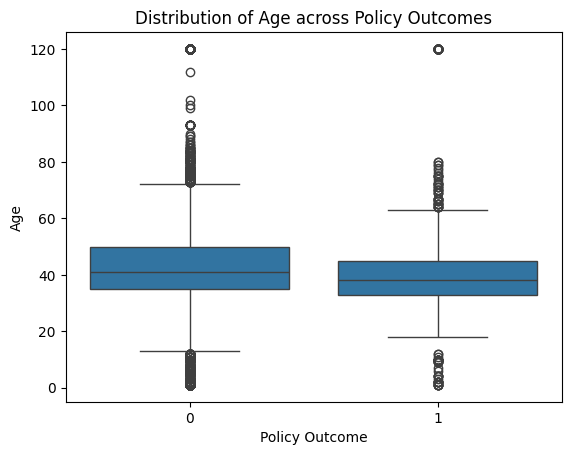

In [ ]:
# 1. Visualize the distribution of Age across different policy outcomes

sns.boxplot(x='target', y='Age', data=df)
plt.title('Distribution of Age across Target')
plt.xlabel('Target')
plt.ylabel('Age')
plt.show()

#

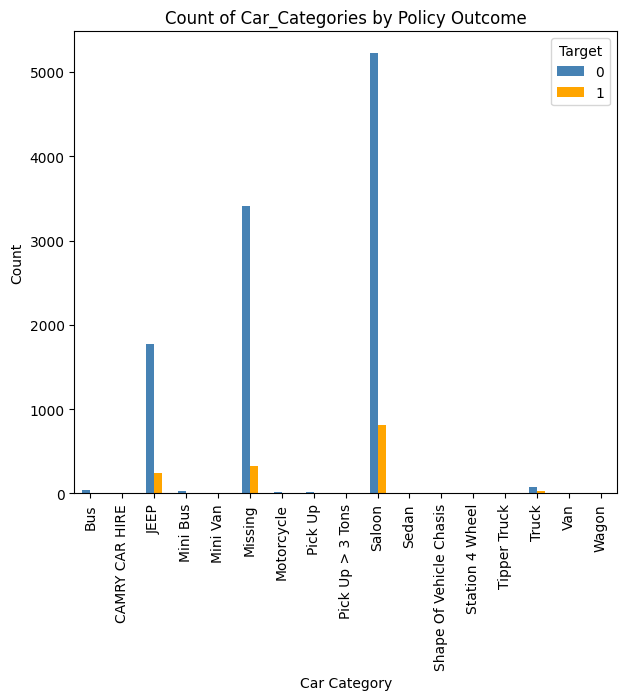

In [ ]:
# 2.	How does the count of different car categories (Car_Category) break down by policy outcome?

grouped_data = df.groupby(['Car_Category', 'target']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', figsize=(7, 6), color=['steelblue', 'orange'])
plt.title('Count of Car_Categories by Policy Outcome')
plt.xlabel('Car Category')
plt.ylabel('Count')
plt.legend(title='Target')
plt.xticks(rotation=90)
plt.show()

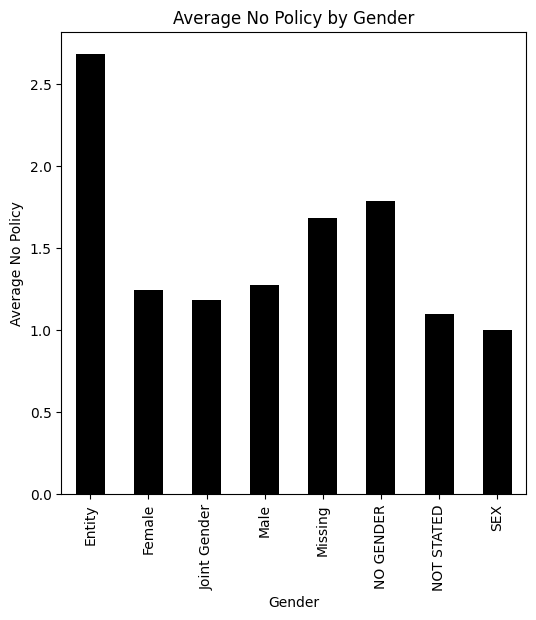

In [ ]:
# 3.	Visualize the number of policies (No_Pol) by Gender

average_no_policy = df.groupby('Gender')['No_Pol'].mean()
plt.figure(figsize=(6,6))
average_no_policy.plot(kind='bar', color=['black'])
plt.title('Average No Policy by Gender')
plt.xlabel('Gender')
plt.ylabel('Average No Policy')
plt.xticks(rotation=90)
plt.show()

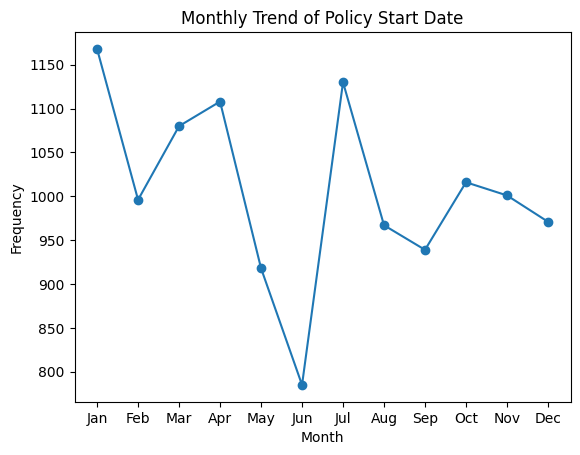

In [ ]:
# 4	Visualize the monthly trend for the start date of policies

df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])
df['Policy_Start_Month'] = df['Policy Start Date'].dt.month
monthly_counts = df['Policy_Start_Month'].value_counts().sort_index()
plt.plot (monthly_counts.index, monthly_counts.values, marker = 'o')
plt.xticks(range(1, 13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Monthly Trend of Policy Start Date')
plt.show()
#

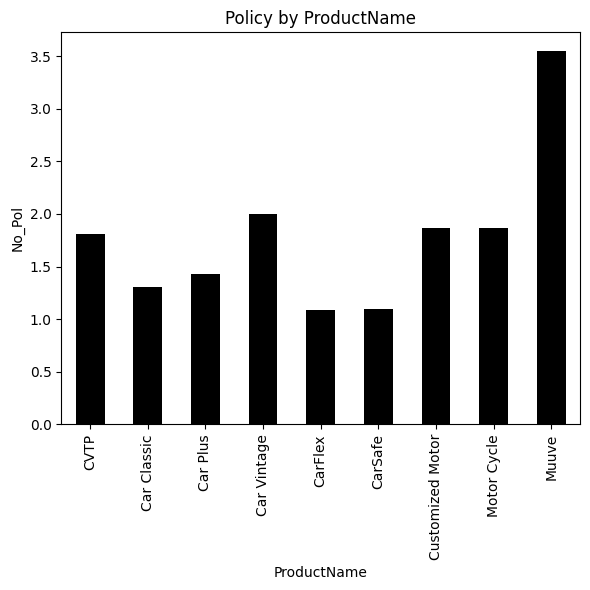

In [ ]:
# 5.	Create a bar chart showing the number of policies by ProductName

plt.figure(figsize=(6, 6))
average_no_policy = df.groupby('ProductName')['No_Pol'].mean()
average_no_policy.plot(kind='bar', color=['black'])
plt.xticks(rotation=90)
plt.xlabel('ProductName')
plt.ylabel('No_Pol')
plt.title('Policy by ProductName')
plt.tight_layout()
plt.show()

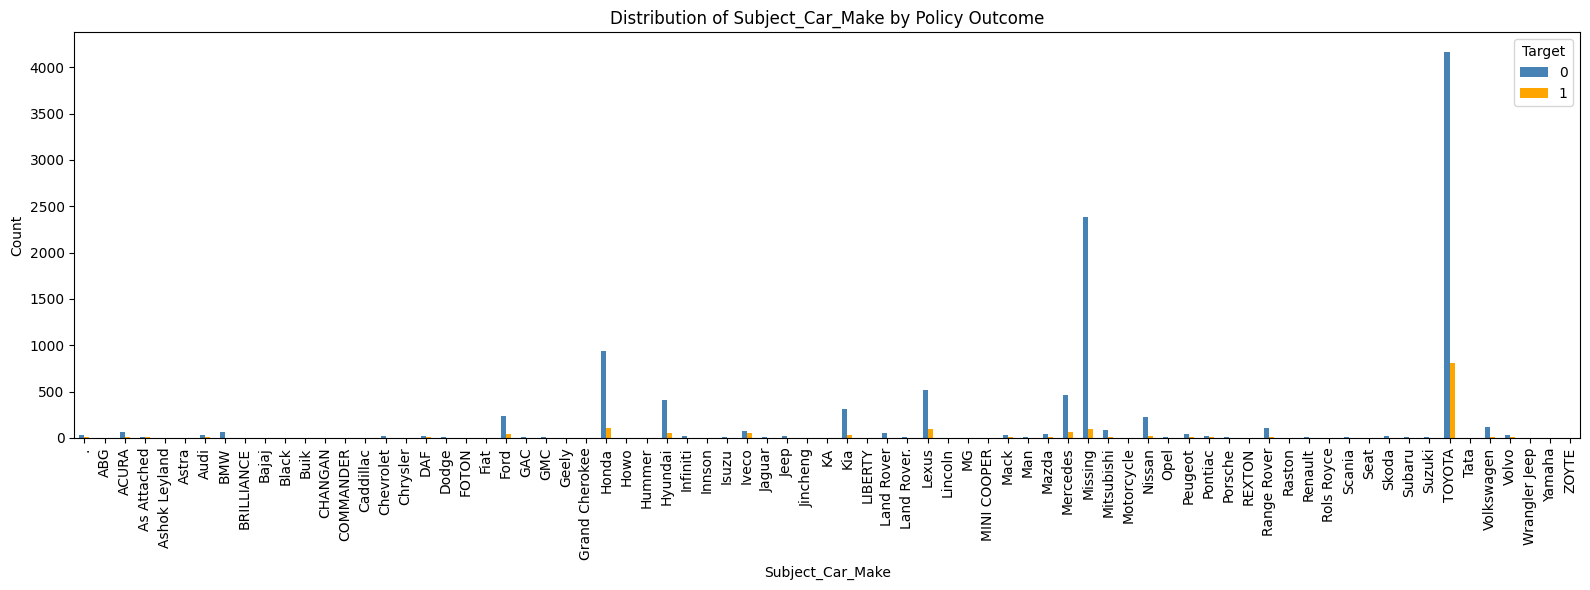

In [ ]:
#6.	How does Car_Make distribution vary across the target variable?

grouped_data = df.groupby(['Subject_Car_Make', 'target']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', figsize=(16, 6), color=['steelblue', 'orange'])
plt.title('Distribution of Subject_Car_Make by Policy Outcome')
plt.xlabel('Subject_Car_Make')
plt.ylabel('Count')
plt.legend(title='Target')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

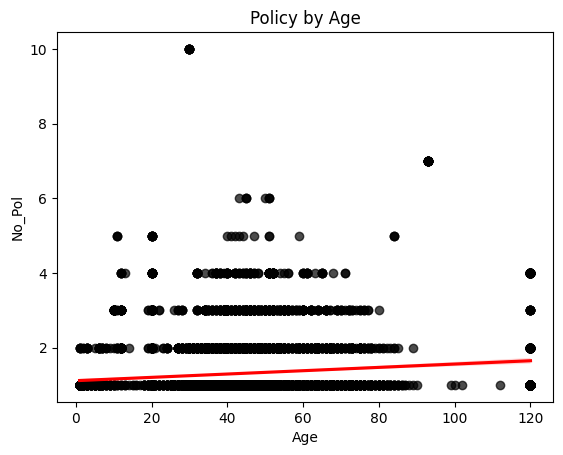

In [ ]:
# 7.	Relationship between No_Pol and Age in a scatter plot

plt.scatter (df['Age'], df['No_Pol'], color='Black',alpha= 0.7)
plt.ylabel('No_Pol')
plt.xlabel('Age')
plt.title('Policy by Age')
sns.regplot(x='Age', y='No_Pol', data=df, scatter=False, color='red')
plt.show()
# There is no relationship

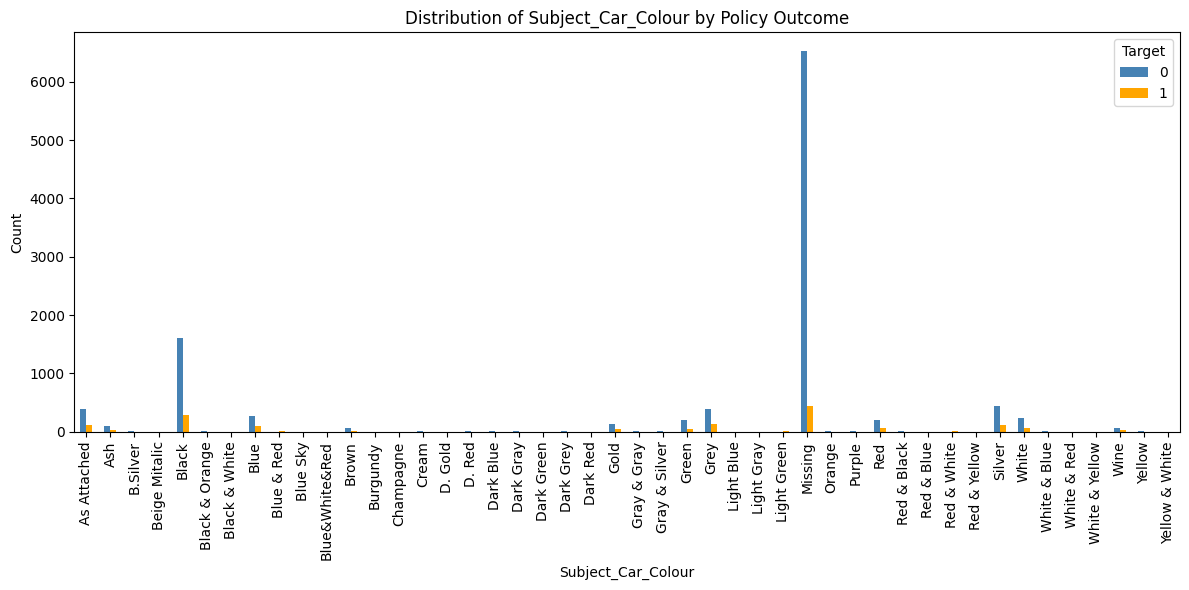

In [ ]:
# 8.	Show a pie chart or bar plot of the target variable’s distribution by Subject_Car_Colour?

grouped_data = df.groupby(['Subject_Car_Colour', 'target']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', figsize=(12, 6), color=['steelblue', 'orange'])
plt.title('Distribution of Subject_Car_Colour by Policy Outcome')
plt.xlabel('Subject_Car_Colour')
plt.ylabel('Count')
plt.legend(title='Target')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

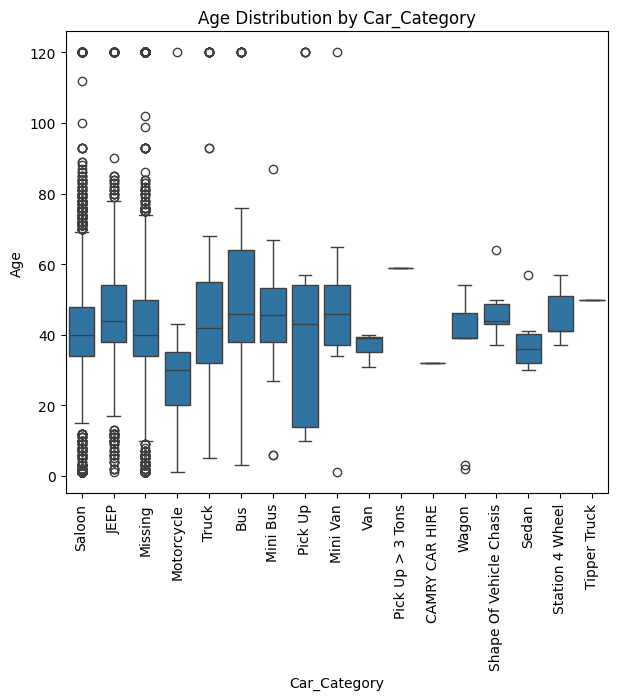

In [ ]:
# 9 Create a box plot of Age for each car category to compare age distributions

fig, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(data=df, x='Car_Category', y='Age')
plt.xticks(rotation=90)
plt.xlabel('Car_Category')
plt.ylabel('Age')
plt.title('Age Distribution by Car_Category')
plt.show()